<a href="https://colab.research.google.com/github/karthik-vana/Heart-Disease-Prediction/blob/main/Heart_Disease_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
import joblib
import warnings
warnings.filterwarnings('ignore')


In [ ]:
# loading dataset
df = pd.read_csv('/content/heart.csv')
df.sample(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
290,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
285,46,1,0,140,311,0,1,120,1,1.8,1,2,3,0
30,41,0,1,105,198,0,1,168,0,0.0,2,1,2,1
242,64,1,0,145,212,0,0,132,0,2.0,1,2,1,0
54,63,0,2,135,252,0,0,172,0,0.0,2,0,2,1


In [ ]:
df.shape

(303, 14)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [ ]:
# target distribution
df['target'].value_counts()

,count
target,
1,165
0,138


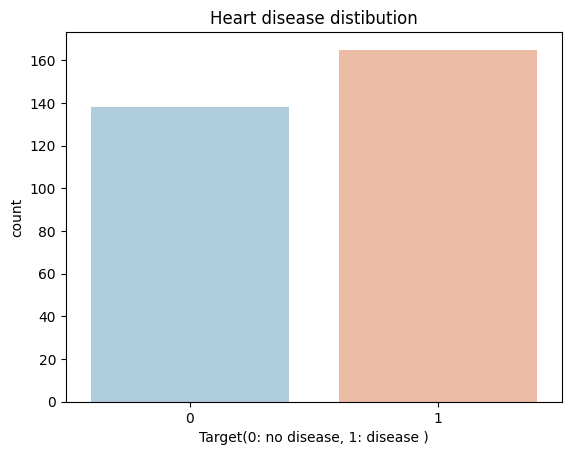

In [ ]:
# visualize target distribution
plt.figure()
sns.countplot(x = 'target',data =df, palette='RdBu_r')
plt.title('Heart disease distibution')
plt.xlabel('Target(0: no disease, 1: disease )')
plt.ylabel('count')
plt.savefig('heart_distribution.png')
plt.show()

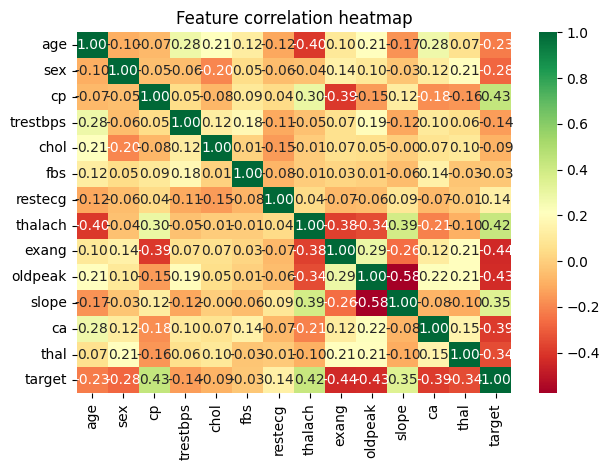

In [ ]:
# correlation heatmap
plt.figure()
corrmat = df.corr()
sns.heatmap(corrmat, annot=True,cmap='RdYlGn',fmt = '.2f')
plt.title('Feature correlation heatmap')
plt.tight_layout()
plt.savefig('correlation_heatmap.png')
plt.show()


In [ ]:
# Data preprocessing
# creating dummies for categorical columns

dataset = pd.get_dummies(df, columns=['sex','cp','fbs','restecg','exang','slope','ca','thal'])


In [ ]:
# ind & dep

y = dataset['target']
X = dataset.drop(['target'],axis =1)


In [ ]:
# scaling numerical features
scaler = StandardScaler()
columns_to_scale  = ['age','trestbps','chol','thalach','oldpeak']
X[columns_to_scale] = scaler.fit_transform(X[columns_to_scale])

In [ ]:
from pandas.core.tools.datetimes import Scalar
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [ ]:
# now spliting data into train & test

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=42)


In [ ]:
len(X_train), len(y_train)

(242, 242)

In [ ]:
len(X_test),len(y_test)

(61, 61)

In [ ]:
# models knn * randomforest

from sklearn.model_selection import cross_val_score
knn_scores = []
k_range = range(1, 31)

for i in k_range:
    knn = KNeighborsClassifier(n_neighbors=i)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    knn_scores.append(scores.mean())

In [ ]:
knn_scores

[np.float64(0.7481666666666666),
 np.float64(0.7691666666666667),
 np.float64(0.8263333333333334),
 np.float64(0.7775),
 np.float64(0.8181666666666667),
 np.float64(0.806),
 np.float64(0.7976666666666666),
 np.float64(0.8225),
 np.float64(0.8141666666666667),
 np.float64(0.8019999999999999),
 np.float64(0.8101666666666667),
 np.float64(0.8225),
 np.float64(0.8096666666666668),
 np.float64(0.8016666666666667),
 np.float64(0.8056666666666666),
 np.float64(0.8015000000000001),
 np.float64(0.8053333333333335),
 np.float64(0.8055),
 np.float64(0.8135),
 np.float64(0.8176666666666668),
 np.float64(0.8135),
 np.float64(0.8096666666666668),
 np.float64(0.8176666666666665),
 np.float64(0.8053333333333332),
 np.float64(0.8176666666666665),
 np.float64(0.8136666666666666),
 np.float64(0.8135),
 np.float64(0.8013333333333333),
 np.float64(0.8053333333333332),
 np.float64(0.7971666666666666)]

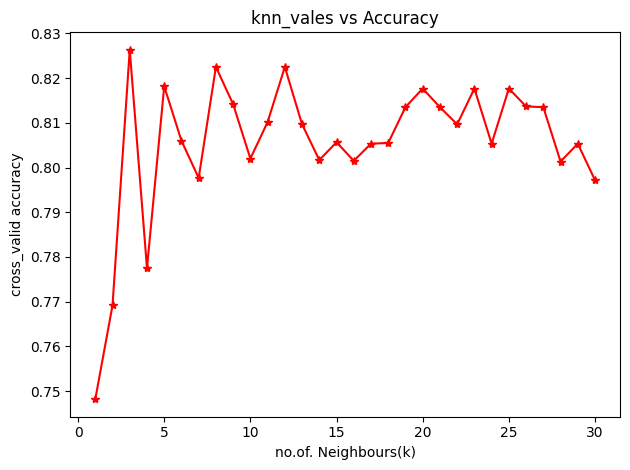

In [ ]:
# ploting k values vs score
plt.figure()
plt.plot(k_range,knn_scores,color='red', marker= '*')
plt.xlabel('no.of. Neighbours(k)')
plt.ylabel('cross_valid accuracy')
plt.title('knn_vales vs Accuracy')
plt.tight_layout()
plt.savefig('knn_K_optimization.png')
plt.show()

In [ ]:
best_k = k_range[np.argmax(knn_scores)]
print(f'best k value : {best_k} best cv accurcy{max(knn_scores)}')

best k value : 3 best cv accurcy0.8263333333333334


In [ ]:
# training final knn model

knn_final = KNeighborsClassifier(n_neighbors=3)
knn_final.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
# knn predictions

y_pred_knn = knn_final.predict(X_test)
knn_accuracy = accuracy_score(y_test,y_pred_knn)
print(f'knn accuracy : {knn_accuracy}')
print(f'knn classification report : {classification_report(y_test,y_pred_knn)}')

knn accuracy : 0.8688524590163934
knn classification report :               precision    recall  f1-score   support

           0       0.84      0.90      0.87        29
           1       0.90      0.84      0.87        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



In [ ]:
# random forest
param_grid = {'n_estimators':[50,100,200],
              'max_depth':[None,10,20,30],
              'min_samples_split':[2,5,10],
              'min_samples_leaf':[1,2,4]}

In [ ]:
from sklearn.model_selection import GridSearchCV
rf_base = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(rf_base,param_grid,cv=5,scoring='accuracy',verbose=1,n_jobs= -1)
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy', verbose=1)

In [86]:
grid_search.best_params_

{'max_depth': None,
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 100}

In [87]:
grid_search.best_score_

np.float64(0.8304421768707483)

In [89]:
rf_final = grid_search.best_estimator_

In [92]:
# randomferst predictions

y_pred_rf = rf_final.predict(X_test)
rf_accuracy = accuracy_score(y_test,y_pred_rf)

print(f'random forest accuracy : {rf_accuracy}')
print(f'classification report : {classification_report(y_test,y_pred_rf)}')

random forest accuracy : 0.8688524590163934
classification report :               precision    recall  f1-score   support

           0       0.86      0.86      0.86        29
           1       0.88      0.88      0.88        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



In [93]:
# feature importance

feature_importance = pd.DataFrame({'feature':X.columns,
                                   'importance':rf_final.feature_importances_}).sort_values('importance',ascending=False)

feature_importance.head(10)

,feature,importance
4,oldpeak,0.093978
28,thal_2,0.090214
3,thalach,0.084738
7,cp_0,0.084679
21,ca_0,0.079874
29,thal_3,0.065019
0,age,0.064452
2,chol,0.053513
1,trestbps,0.052178
17,exang_1,0.050837


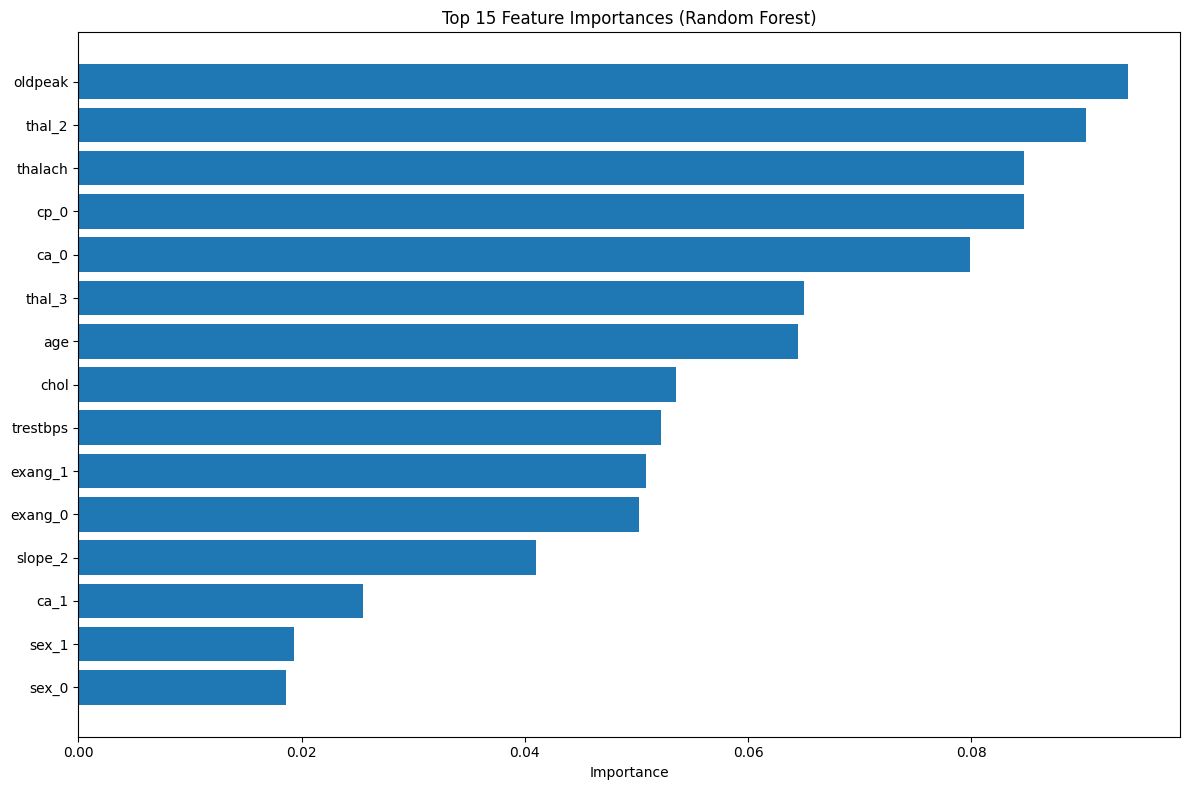

In [94]:
# plot feature importance

plt.figure(figsize=(12, 8))
top_features = feature_importance.head(15)
plt.barh(range(len(top_features)), top_features['importance'])
plt.yticks(range(len(top_features)), top_features['feature'])
plt.xlabel('Importance')
plt.title('Top 15 Feature Importances (Random Forest)')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.savefig('feature_importance.png')
plt.show()

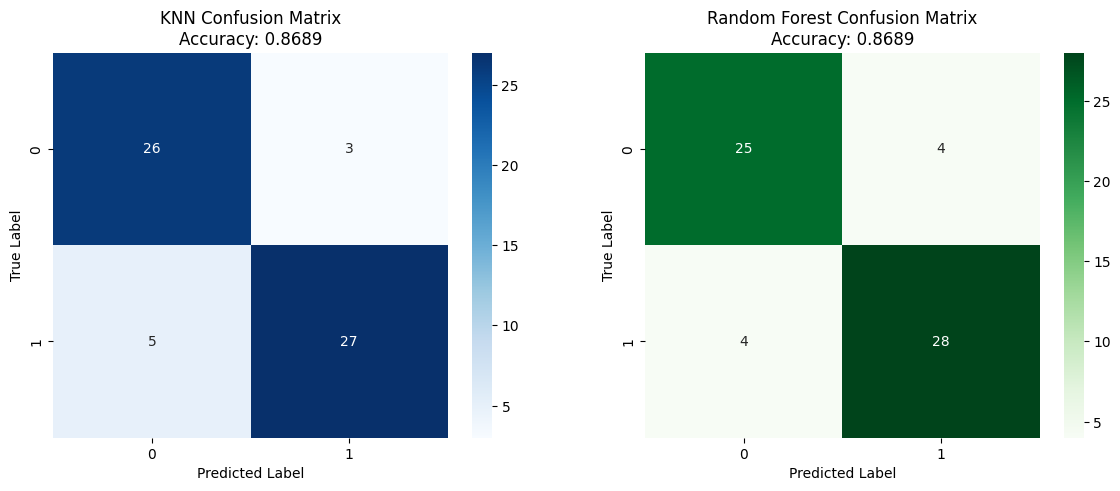

In [99]:
# comparision of confusion matrix of knn & rf

fig , axes = plt.subplots(1,2, figsize=(14,5))
#knn
cm_knn = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title(f'KNN Confusion Matrix\nAccuracy: {knn_accuracy:.4f}')
axes[0].set_ylabel('True Label')
axes[0].set_xlabel('Predicted Label')
#rf
cm_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens', ax=axes[1])
axes[1].set_title(f'Random Forest Confusion Matrix\nAccuracy: {rf_accuracy:.4f}')
axes[1].set_ylabel('True Label')
axes[1].set_xlabel('Predicted Label')

plt.savefig('confusion_matrices.png')
plt.show()

In [101]:
# Choose the best model and save it
if rf_accuracy > knn_accuracy:
    best_model = rf_final
    best_model_name = "Random Forest"
    best_accuracy = rf_accuracy
else:
    best_model = knn_final
    best_model_name = "KNN"
    best_accuracy = knn_accuracy

print("\n" + "="*50)
print(f"BEST MODEL: {best_model_name}")
print(f"ACCURACY: {best_accuracy}")
print("="*50)

# Save the best model
joblib.dump(best_model, 'heart_disease_model.pkl')
joblib.dump(X.columns.tolist(), 'feature_columns.pkl')

print("\nModel saved as 'heart_disease_model.pkl'")
print("Scaler saved as 'scaler.pkl'")
print("Feature columns saved as 'feature_columns.pkl'")
print("\nModel training complete!")



BEST MODEL: KNN
ACCURACY: 0.8688524590163934

Model saved as 'heart_disease_model.pkl'
Scaler saved as 'scaler.pkl'
Feature columns saved as 'feature_columns.pkl'

Model training complete!
